In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [141]:
df = pd.read_csv('myexcel - myexcel.csv.csv')

In [143]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [149]:
df['Height'] = np.random.randint(150, 180, size=len(df))

In [151]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,173,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,164,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,156,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,175,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,158,231,NaN,5000000.0


1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.

In [154]:
team_distribution = df['Team'].value_counts()
team_percentage = ((team_distribution)/len(df))*100

In [156]:
team_distribution

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

In [158]:
team_percentage

Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.275109
Dallas Mavericks          3.275109
Orlando Magic  

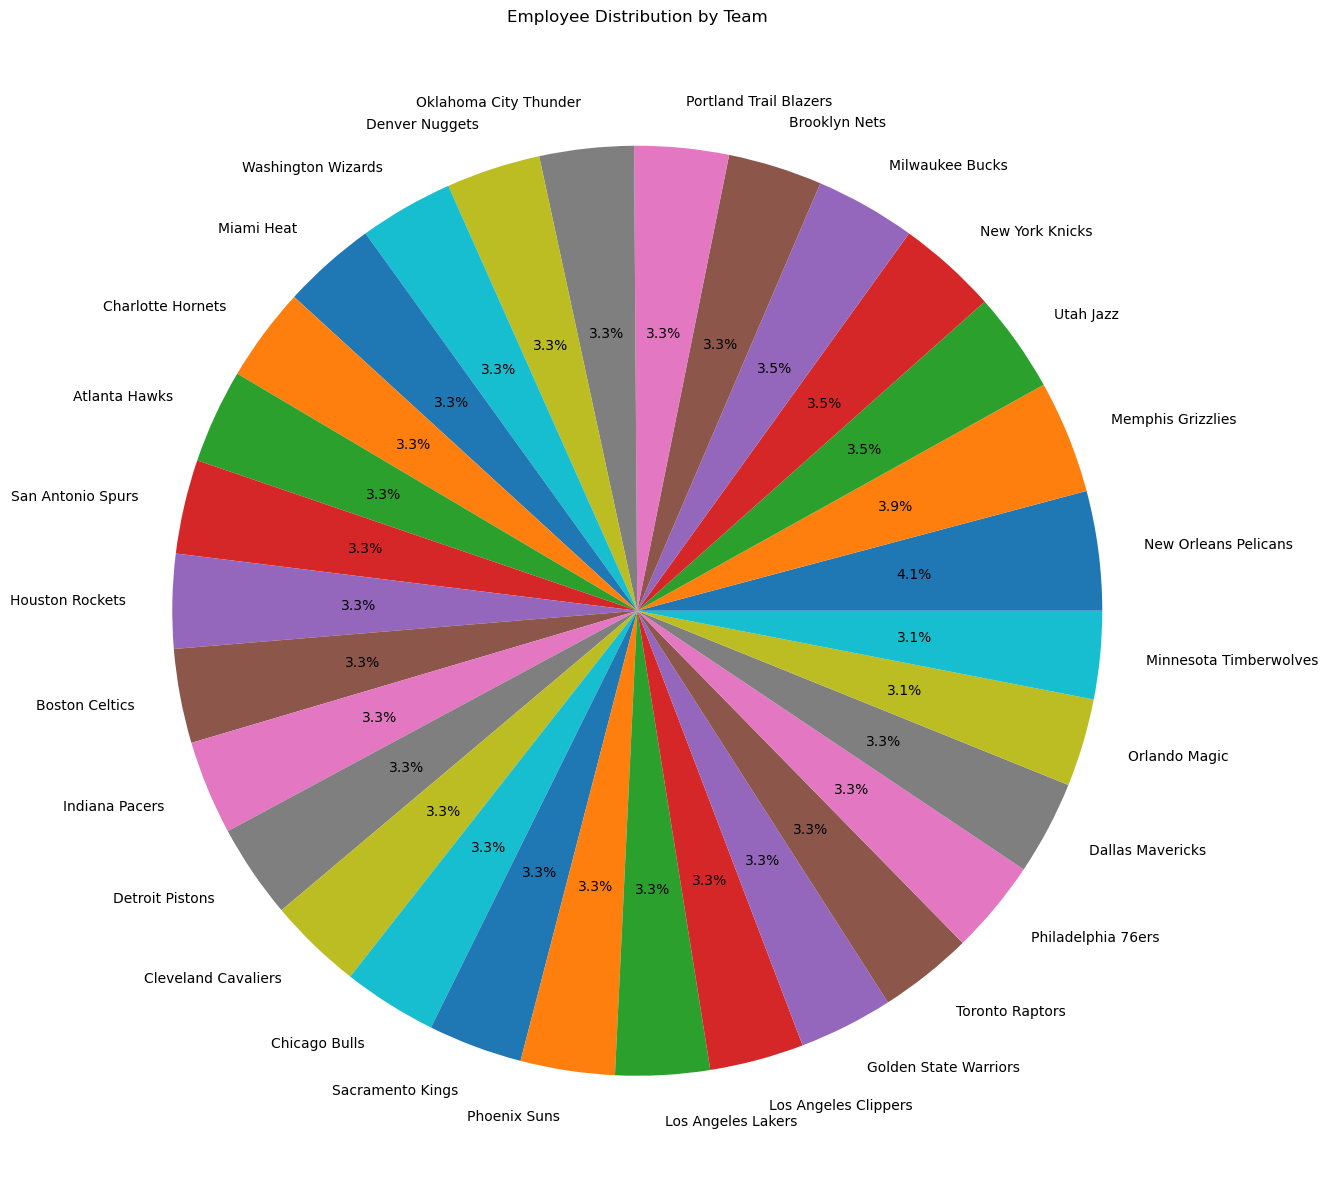

In [160]:
plt.figure(figsize=(15,43))
plt.pie(team_distribution, labels=team_distribution.index, autopct='%1.1f%%')  
plt.title('Employee Distribution by Team')  
plt.show()  

2. Segregate employees based on their positions within the company. 

In [163]:
position = df['Position'].value_counts()
position

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Employees by Position')

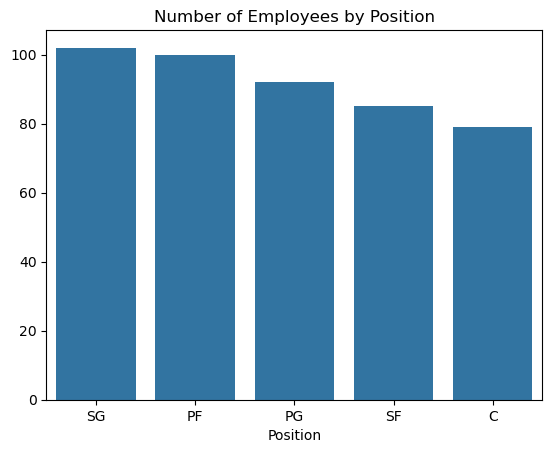

In [165]:
sns.barplot(x=position.index, y=position.values)
plt.title('Number of Employees by Position')  

3. Identify the predominant age group among employees

In [168]:
Age_distribution = df['Age'].value_counts()
predominant_age = Age_distribution.idxmax()

In [170]:
Age_distribution

Age
24    47
25    46
27    41
23    41
26    36
28    31
30    31
29    28
22    26
31    22
20    19
21    19
33    14
32    13
34    10
36    10
35     9
37     4
38     4
40     3
39     2
19     2
Name: count, dtype: int64

In [176]:
predominant_age

24

Text(0.5, 1.0, 'Age Distribution of Employees')

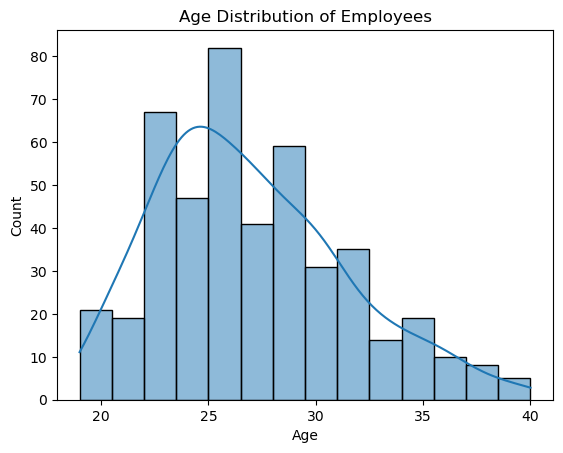

In [178]:
sns.histplot(data=df, x= df.Age, kde=True)
plt.title('Age Distribution of Employees') 

4.Discover which team and position have the highest salary expenditure. 

In [181]:
salary_by_team = df.groupby('Team')['Salary'].sum()  
salary_by_position = df.groupby('Position')['Salary'].sum()  

In [187]:
highest_team_salary = salary_by_team.idxmax(), salary_by_team.max()  
highest_position_salary = salary_by_position.idxmax(), salary_by_position.max() 

In [189]:
highest_team_salary

('Cleveland Cavaliers', 106988689.0)

In [191]:
highest_position_salary

('C', 466377332.0)

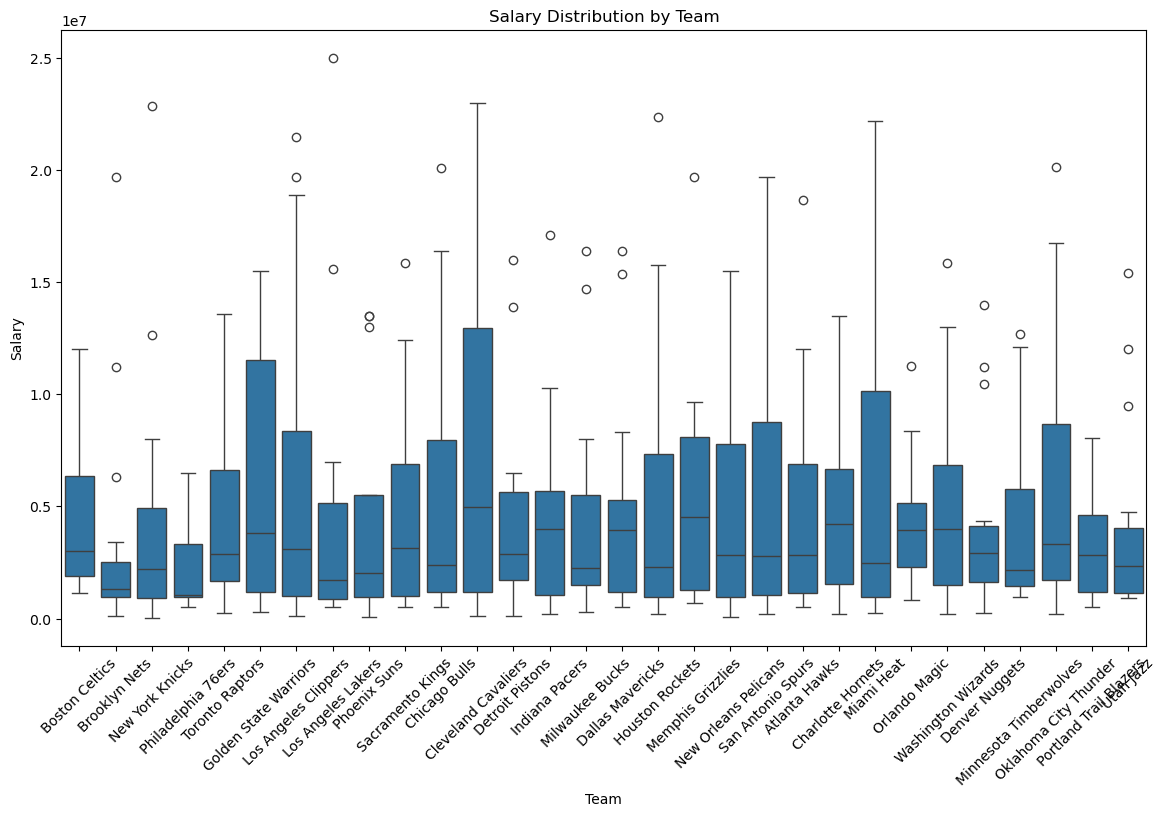

In [211]:
plt.figure(figsize=(14, 8))  
sns.boxplot(x='Team', y='Salary', data=df)  
plt.title('Salary Distribution by Team')  
plt.xlabel('Team')  
plt.ylabel('Salary')  
plt.xticks(rotation=45)   
plt.show()

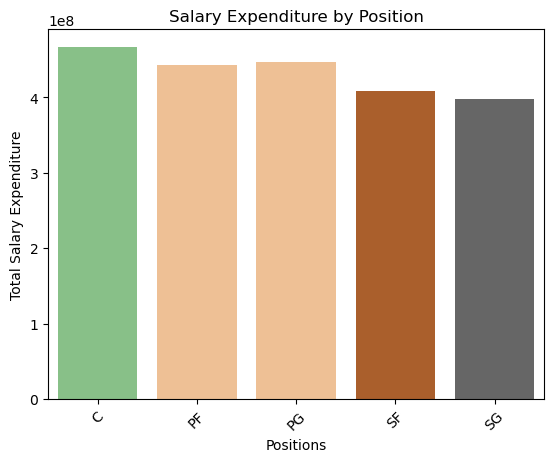

In [194]:
sns.barplot(x=salary_by_position.index,y=salary_by_position.values, hue=salary_by_position, legend=False,palette="Accent_r")  
plt.title('Salary Expenditure by Position')
plt.xlabel('Positions')  
plt.ylabel('Total Salary Expenditure')  
plt.xticks(rotation=45)  
plt.show()  

5. Investigate if there's any correlation between age and salary, and represent it visually. 

In [197]:
correlation = df['Age'].corr(df['Salary'])
correlation

0.21400941226570974

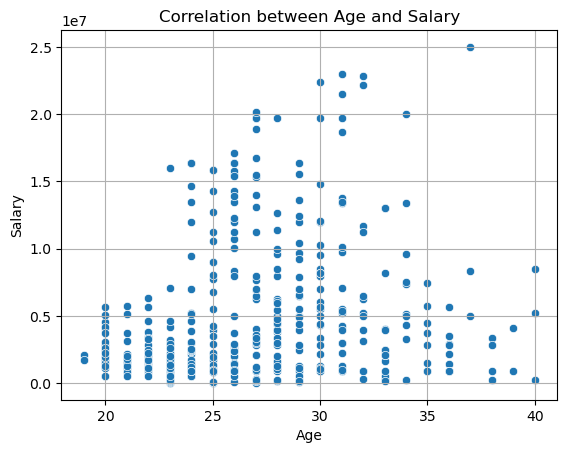

In [199]:
sns.scatterplot(x=df.Age, y=df.Salary)
plt.title('Correlation between Age and Salary')  
plt.xlabel('Age')  
plt.ylabel('Salary')  
plt.grid()
plt.show()  